In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data set link: https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction?select=cubic_zirconia.csv

In [2]:
#Loading the dataset

df = pd.read_csv("Gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [5]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [6]:
##  column id doesnot serve any purpose
df = df.drop(labels=['id'],axis = 1)

In [7]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
X = df.drop("price",axis=1)   
y = df["price"]

In [9]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77


In [10]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((135501, 9), (58072, 9))

In [21]:
X_train.corr()

,carat,depth,table,x,y,z
carat,1.000000,0.029300,0.225181,0.980684,0.980248,0.972174
depth,0.029300,1.000000,-0.230916,-0.008771,-0.009573,0.083495
table,0.225181,-0.230916,1.000000,0.237376,0.232878,0.211533
x,0.980684,-0.008771,0.237376,1.000000,0.999209,0.987605
y,0.980248,-0.009573,0.232878,0.999209,1.000000,0.987513
z,0.972174,0.083495,0.211533,0.987605,0.987513,1.000000


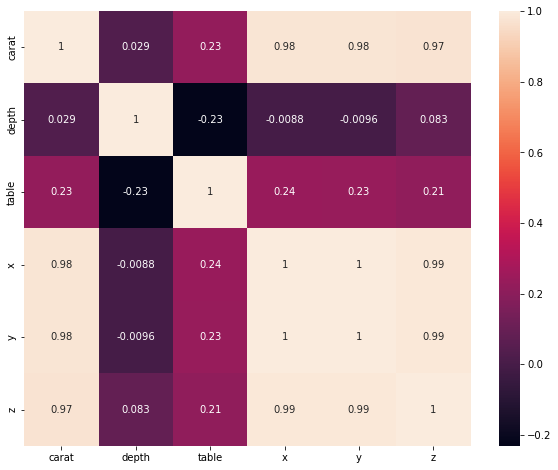

In [19]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [ ]:
### Here it is easily visible that x,y,z and carat are very highly correlated. WE can easily drop x,y and z.

In [14]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

3

In [16]:
corr_features

{'x', 'y', 'z'}

In [17]:
## Drop these highly correlated features as "carat" will be used for ML model
df= df.drop(corr_features,axis=1)

In [18]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619
1,2.03,Very Good,J,SI2,62.0,58.0,13387
2,0.70,Ideal,G,VS1,61.2,57.0,2772
3,0.32,Ideal,G,VS1,61.6,56.0,666
4,1.70,Premium,G,VS2,62.6,59.0,14453
